# Recall from last time: Deep Learning
## Motivation
 - ## Model and data representation need to match
 - ## Feature engineering gets very difficult, especially with large input spaces (NLP)

## Deep Learning
 - ## Layered approach that (mostly) eliminates feature engineering
 - ## Each layer learns the best representation for the next layer

# $ \\ $
# $ \\ $
![deep-learning](deep-learning.png)

# $ \\ $
# $ \\ $

![ml-evolution](ml-evolution.jpg)
# $ \\ $
# $ \\ $

## Deep learning in practice
 - ## `Keras` is a natural tool because it operates in layers
 - ## Used the `Dense` layer which is matrix multiplication and a nonlinear function
 - ## Made models with millions of parameters to optimize
 - ## Used `ADAM` to find them
 - ## Ways to combat overfitting: `L2`, `L1`, `Dropout`, `EarlyStopping`



# $ \\ $
# $ \\ $

# Recall: our job is to build the right set of matrix operations / nonlinear functions that can learn the behavior we want
# $ \\ $
# $ \\ $
## What layer / operation should we use?
 - ## Last time we used `Dense` layers
 - ## We saw clever ways to use `Dense` layers (ie learning distances between images)

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $


# Today: Redo document classification:
 - ## With better / more appropriate matrix operations for NLP.
 
# $ \\ $
# $ \\ $
# Recall, the rest of NLP is
 - ## Finding better text representations
 - ## Finding better matrix operations
 - ## Constructing the right models out of these building block


# $ \\ $
# $ \\ $

## So far we've used the bag of words / TFIDF
 - ## Powerful
 - ## Easy
 - ## Fast
 - ## Gave interpretable models

# $ \\ $
## What are the limitations of the BOW?
# $ \\ $
# $ \\ $
# $ \\ $
## Cons of Bag of Words?
 - ## Kills order: 
   - ## `the quick brown fox jumps over the lazy dog`
   - ## `the quick brown dog jumps over the lazy fox`
 - ## Static: can't impart or learn additional information on top
   - ## e.g. stop words, TFIDF, etc
 - ## Feature engineering is hard. The input space is
   - ## Very large
   - ## Very sparse
   - ## Redundant: many features code for the same thing 
     - ## Don't want to have features like  {`loathe`, or `hate`, or `despise` etc}
     - ## Related: No semantics: $|\mathrm{like} - \mathrm{love}| = |\mathrm{like} - \mathrm{hate}|$
   

# $ \\ $

## Sparsity
 - ## The average sentence has about 1 in 10$^{-3}$ to 10$^{-4}$ nonzero items

## What does 10% sparsity look like?
![cat](cat.jpg)

# $ \\ $
# $ \\ $
## Good news: This is perfect for deep learning
 - ## Don't want to do feature engineering
 - ## Goal: come up with the right matrix operation to solve these issues
 

## What should the matrix operation look like? 
# $ \\ $
# $ \\ $
## Requirements:
 - ## Work word by word (ie not kill order)
 - ## Learnable (ie some matrix operation with parameters that we'll optimize)
 - ## Able to capture nuance and semantics

# $ \\ $
# $ \\ $

# Embedding
## Definition: A vector representation for text
 - ## Usually learned (in an ML sense) from some data
 - ## In our case, today, a representation for words

# $ \\ $
# $ \\ $
## We want an operation that works word by word
 - ## Sequence of words $ \Rightarrow$ sequence of vector representations

# $ \\ $
# $ \\ $
# `The quick brown fox`  $\Rightarrow $ (tokenize)
# $ \\ $
# $\quad $ [`the`, `quick`, `brown`, `fox`] $\Rightarrow $ (word index)
# $ \\ $
# $\qquad \qquad $ [0, 1, 3, 5] $\Rightarrow $ (one-hot)
# $ \\ $
# $\qquad \qquad \qquad$ $\begin{bmatrix}
           1 \\
           0 \\
           \vdots \\
           0
         \end{bmatrix}_{the}, \; 
         \begin{bmatrix}
           0 \\
           1 \\
           \vdots \\
           0
         \end{bmatrix}_{quick}, \;
         \begin{bmatrix}
           0 \\
           \vdots \\
           1 \\
           0
         \end{bmatrix}_{brown},
         \Rightarrow $ (embed)
# $ \\ $
# $$[ v^{d}_{\mathrm{the}}, v^{d}_{\mathrm{quick}}, v^{d}_{\mathrm{brown}}, v^{d}_{\mathrm{fox}}]$$

# $ \\ $
# $ \\ $
## NB: The BOW just sums the vectors instead of the `embed` step
# $ \\ $
# $ \\ $
## What is the the `embed` step in matrix speak?
 - ## Operates on a one-hot vector
 - ## Returns a vector in $\mathbb{R}^{\mathrm{embed}}$
# $ \\ $
# $ \\ $
## $$ \left[\begin{array}{ccc}
   e_{0,0} & e_{0, 1} &  \dots & e_{0, N_{words}}\\
   e_{1,0} & e_{1, 1} & \dots & e_{1, N_{words}}\\
   e_{2,0} & e_{2, 1} & \dots & e_{2, N_{words}}\\
   & \vdots \\
   e_{N_{embed},0} & e_{N, 1} & \dots & e_{N_{embed}, N_{words}}
\end{array}\right]
\begin{bmatrix}
  0 \\
  \vdots  \\
  1  \\
  \vdots \\
  0
\end{bmatrix} \\ $$
# $ \\ $
# $ \\ $
## The embedding operation just picks out a column of the embedding matrix.
# $ \\ $
# $ \\ $

## In practice, it will take up too much memory to carry around one-hot encoded vectors
 - ## They live in $\mathbb{R}^{\approx 100000}$

# $ \\ $
# $ \\ $
## It will be nice to have a matrix operation smart enough to work on word-indices
 - ## Instead of turning into a one-hot vector, it can just look up the correct column in the embedding matrix

# $ \\ $
# $ \\ $


# $ \\ $
# $ \\ $
## Unsurprisingly, `keras` has a nice builtin for this
 - ## `from tensorflow.keras.layers import Embedding`

# $ \\ $


## Let's look at an embedding in `keras`

In [1]:
# restart
import numpy as np
import pandas as pd
%pylab inline

np.random.seed(1234)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from tensorflow.keras.layers import Embedding
Embedding?

Init signature:
Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None,
    **kwargs,
)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used on positive integer inputs of a fixed range. The
`tf.keras.layers.TextVectorization`, `tf.keras.layers.StringLookup`,
and `tf.keras.layers.IntegerLookup` preprocessing layers can help prepare
inputs for an `Embedding` layer.

This layer accepts `tf.Tensor` and `tf.RaggedTensor` inputs. It cannot be
called with `tf.SparseTensor` input.

Example:

>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word index) in 

## Turns positive integers (indexes) into dense vectors of fixed size.
 - ## e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

## Args:
 - ## input_dim: Integer. Size of the vocabulary,
      - ## i.e. maximum integer index + 1.
 - ## output_dim: Integer. Dimension of the dense embedding.

In [3]:

from tensorflow.keras import backend as K

In [4]:
K.clear_session()

embedding = Embedding(10, 3)

word_index_seq = np.array([[0, 5, 3, 9, 2, 1], [3, 2, 6, 7, 2, 8]])
word_index_seq

array([[0, 5, 3, 9, 2, 1],
       [3, 2, 6, 7, 2, 8]])

In [5]:
outputs = embedding(K.variable(word_index_seq))
outputs = K.eval(outputs)
outputs.shape

(2, 6, 3)

In [6]:
print(embedding.get_weights()[0].shape)
embedding.get_weights()[0]

(10, 3)


array([[-0.04930722, -0.03289516, -0.02691274],
       [-0.01423742, -0.00105369, -0.01823703],
       [-0.04936332, -0.04127932, -0.01308597],
       [ 0.04243189,  0.03323973, -0.04379163],
       [-0.01621838,  0.01408729, -0.01059724],
       [ 0.0111384 , -0.01451325,  0.01857306],
       [-0.04930484, -0.0167668 , -0.00273687],
       [-0.02032974, -0.00522027, -0.01588361],
       [ 0.04318592,  0.01752671, -0.0271991 ],
       [ 0.0319397 , -0.0187916 , -0.03249002]], dtype=float32)

## In reality `word_index_seqs` might come from
```python

word_index_seq = [[word_to_index.get(word) for word in document] for document in documents]
```

# $ \\ $
# $ \\ $
## Embeddings will satisfy our needs
 - ## Work word by word
 - ## Matrix operation (and still fast)
 - ## Learnable parameters so learnable representation
 - ## We will get dense word represntation for free

# $ \\ $
# $ \\ $
# $ \\ $

# Mechanics of using Embeddings
 - ## Let's use it on a real dataset

In [7]:
import os
import glob

import sys
sys.path.insert(0, ".")
from helpers import load_imdb_data_text

(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('../data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


In [8]:
train_docs[0]

'Wrestlemania 14 is not often looked as one of the great Wrestlemania\'s but I would personally put it, in my top 5, if not the top 3. It has so many great things, and it truly signified the birth of The Attitude Era, which was WWE\'s best era, in my opinion. HBK has the heart of a lion, and him putting over Austin like he did, on his way out, was pure class on his part. It has one of the hottest crowds you will ever see, and it has J.R and The King at their announcing best!. <br /><br />Matches.<br /><br />15 \x96 team battle royal LOUD pop for L.O.D\'s return. I\'m not a fan of battle royal\'s, and this is yet another average one. Very predictable, even when you 1st see it, it\'s obvious L.O.D would win. Looking at Sunny for 8 or so minutes though, definitely helps. <br /><br />2/5<br /><br />WWF Light Heavyweight Championship<br /><br />Taka Michinoku|C| Vs Aguila.<br /><br />Taka gets a surprising pop, with his entrance. Fast, high-flying, and very exciting. If these two had more t

## As usual, we need to turn next into numbers, how should we do that?
# $ \\ $
# $ \\ $
## We need our text to be represented in slightly different form
# $ \\ $
# $ \\ $
# Before (BOW/TFIDF):
 - ## Document -> 1 x $N_{words}$ vector


# But we want a sequence of words to preserve order
# We need:
 - ## Document = sequence of words -> sequence of numbers (integers)
 - ## We can use an embedding to do sequence of ints -> sequence of dense vectors



# $ \\ $
# $ \\ $
# $ \\ $
## Question: can we use `CountVectorizer`?
# $ \\ $
# $ \\ $
# $ \\ $
## Have no fear, keras will make it easy!

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
Tokenizer?
# always set a limit to the size of the dictionary (num_words)
# unknown words can be assigned to a special token

Init signature:
Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    analyzer=None,
    **kwargs,
)
Docstring:     
Text tokenization utility class.

Deprecated: `tf.keras.preprocessing.text.Tokenizer` does not operate on
tensors and is not recommended for new code. Prefer
`tf.keras.layers.TextVectorization` which provides equivalent functionality
through a layer which accepts `tf.Tensor` input. See the
[text loading tutorial](https://www.tensorflow.org/tutorials/load_data/text)
for an overview of the layer and text handling in tensorflow.

This class allows to vectorize a text corpus, by turning each
text into either a sequence of integers (each integer being the index
of a token in a dictionary) or into a vector where the coefficient
for each token could be binary, based on word count, based on tf-idf...

By default, all punctuation is removed, turning the texts into
space-separ

## Text tokenization utility class.

###   $\quad$ This class allows to vectorize a text corpus, by turning each
###   $\quad$ text into either a sequence of integers (each integer being the index
###   $\quad$  of a token in a dictionary) or into a vector where the coefficient
###   $\quad$   for each token could be binary, based on word count, based on tf-idf...


## Arguments
### $\quad$ `num_words`: the maximum number of words to keep, based
### $\qquad$        on word frequency. Only the most common `num_words-1` words will
### $\qquad$        be kept.
### $\quad$    `filters`: a string where each element is a character that will be
### $\qquad$        filtered from the texts. The default is all punctuation, plus
### $\qquad$        tabs and line breaks, minus the `'` character.
### $\quad$    `lower`: boolean. Whether to convert the texts to lowercase.
### $\quad$    `split`: str. Separator for word splitting.
### $\quad$    `char_level`: if True, every character will be treated as a token.
### $\quad$    `oov_token`: if given, it will be added to word_index and used to
### $\qquad$        replace out-of-vocabulary words during text_to_sequence calls


# $ \\ $
# $ \\ $
## Recall: what did `CountVectorizer` do with unknown words?
# $ \\ $
## We don't have that luxury!
 - ## Why?

# $ \\ $
# $ \\ $

In [10]:
tokenizer = Tokenizer(num_words=50000, lower=True)
tokenizer.fit_on_texts(train_docs)
len(tokenizer.word_index)

88582

In [11]:
tokenizer.word_index["the"]  # this should be low. It's sorted by frequency

1

In [12]:
tokenizer.texts_to_sequences?

Signature: tokenizer.texts_to_sequences(texts)
Docstring:
Transforms each text in texts to a sequence of integers.

Only top `num_words-1` most frequent words will be taken into account.
Only words known by the tokenizer will be taken into account.

Args:
    texts: A list of texts (strings).

Returns:
    A list of sequences.
File:      c:\users\rob6694\miniconda3\envs\nick\lib\site-packages\keras\preprocessing\text.py
Type:      method

In [13]:
train_sequences = tokenizer.texts_to_sequences(train_docs)
test_sequences = tokenizer.texts_to_sequences(test_docs)
type(train_sequences), len(train_sequences)

(list, 25000)

In [14]:
train_sequences[0][:10]

[11037, 2425, 6, 21, 396, 605, 14, 28, 4, 1]

In [15]:
len(train_sequences[0]), len(train_sequences[1])

(797, 145)

## Problem: every document is of different length!
 - ## While not a theoretical problem, its a mechanics problem

## Recall from above

In [16]:
word_index_seq = np.array([[0, 5, 3, 9, 2, 1], [3, 2, 6, 7, 2, 8]])
word_index_seq.shape

(2, 6)

In [17]:
# This is not what we want!
np.array([[0, 5, 3, 9, 2, 1], [3, 7, 2, 8]])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

## What should we do?
# $ \\ $
# $ \\ $
# $ \\ $
## We'll force the sequences to be the same length

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences?

Signature:
pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0,
)
Docstring:
Pads sequences to the same length.

This function transforms a list (of length `num_samples`)
of sequences (lists of integers)
into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
`num_timesteps` is either the `maxlen` argument if provided,
or the length of the longest sequence in the list.

Sequences that are shorter than `num_timesteps`
are padded with `value` until they are `num_timesteps` long.

Sequences longer than `num_timesteps` are truncated
so that they fit the desired length.

The position where padding or truncation happens is determined by
the arguments `padding` and `truncating`, respectively.
Pre-padding or removing values from the beginning of the sequence is the
default.

>>> sequence = [[1], [2, 3], [4, 5, 6]]
>>> tf.keras.preprocessing.sequence.pad_sequences(sequence)
array([[0, 0, 1],
       [0, 2, 3],
       [4,

## This function transforms a list (of length `num_samples`)
## $\quad$ of sequences (lists of integers)
## $\quad$ into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
## $\quad$ `num_timesteps` is either the `maxlen` argument if provided,
## $\quad$ or the length of the longest sequence in the list.

In [19]:
MAX_SEQ_LEN = 125
x_train = pad_sequences(train_sequences, maxlen=MAX_SEQ_LEN, truncating="post")
x_test = pad_sequences(test_sequences, maxlen=MAX_SEQ_LEN, truncating="post")
type(x_train), x_train.shape, x_train.dtype

(numpy.ndarray, (25000, 125), dtype('int32'))

In [20]:
x_train[2]

array([  485,  2278,     6,   239,   115,   570,    15,    24,  1056,
        6887,   105,   138,    14,   338,   654,     2, 40840,  1537,
          18,    26,     6,  1301,  4892,    14,     3,   164,     4,
        7365,   186,   434,    14,     1,  5559,     4,  6041,  1525,
           1,  5559,    60,     6,   445,    20,     3,   664,    31,
         304, 27633,    34,    79,  1037,     1,   877,     6,     3,
        1093,     2,  4203,   944,  1730, 10787,    12,    54,  1456,
           4,  7365,   186,   141,  1127,  1009,     1,    19,     6,
         537,  1577,    31,  1109,  7365,  2232,   138,    14,  7476,
         893,     1,  6538,    39,     1,  5074,    18,    14,   227,
          14,    10,   241,  1943,     9,     6,    79,   711,    14,
        4312,    14,   131,    50,  4761,  5341,   105,     2,   239,
          57, 15492,     7,     7,  9457,  2233,  6192,  5284,     6,
           3,   305,   182,   159,   779,  2179,  9260,    31])

In [21]:
UNKNOWN_TOKEN = "<UNK>"

reverse_lookup = {word: idx for idx, word in tokenizer.word_index.items()}
words = [reverse_lookup.get(i, UNKNOWN_TOKEN) for i in x_train[2]]
print(" ".join(words))

michael winner is probably best known for his revenge themed films such as death wish and chato's land but he is equally gifted as a director of occult horror cinema as the sentinel of 1977 proves the sentinel which is based on a novel by john konvitz who also wrote the screenplay is a clever and immensely creepy religious chiller that no lover of occult horror should consider missing the film is obviously inspired by successful occult classics such as rosemary's baby the exorcist or the omen but as far as i am concerned it is also easily as unsettling as these more widely acclaimed films and probably even creepier br br allison parker christina raines is a beautiful young new york model traumatized by


## NB: it is REALLY important to make sure you can recover your text
 - ## If you can't then something has gone wrong!

# $ \\ $
# $ \\ $
# $ \\ $
## Recap:
 - ## Load documents (list of strings)
 - ## Use tokenizer to turn each document into a list of ints (list of list of int)
 - ## Pad the sequences to standardize the lengths (np.array of num_docs x max-seq-len)

# $ \\ $
## NB: the representation is smaller because we don't have a large $N_{words}$ dimension

In [22]:
Embedding?

Init signature:
Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None,
    **kwargs,
)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used on positive integer inputs of a fixed range. The
`tf.keras.layers.TextVectorization`, `tf.keras.layers.StringLookup`,
and `tf.keras.layers.IntegerLookup` preprocessing layers can help prepare
inputs for an `Embedding` layer.

This layer accepts `tf.Tensor` and `tf.RaggedTensor` inputs. It cannot be
called with `tf.SparseTensor` input.

Example:

>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word index) in 

# What is the shape of our input going to be? 
## We have sequences of `MAX_SEQ_LEN` integers (max value of `MAX_WORDS`)
$ \\ $ 
```python
x_train = pad_sequences(x_train, maxlen=MAX_SEQ_LEN)
```
# $ \\ $
$ \\ $ 
```python
word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
```
# $ \\ $
# $ \\ $
## EACH WORD gets "embedded" and becomes a $d_{embedding}$-dimensional, dense vector.
$ \\ $ 
$ \\ $ 
```python
word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
hidden_state = Embedding(
    MAX_WORDS, 
    embedding_dim, 
    input_length=MAX_SEQ_LEN
)(word_input)
```
$ \\ $ 
$ \\ $ 
## `word_input` is an integer sequence of length exactly `MAX_SEQ_LEN`
## The `Embedding(MAX_WORDS, 128)` turns each word into a `128-d` vector
# $ \\ $ 
# $ \\ $
# What is the shape of `hidden_state` ?
# $ \\ $ 
# $ \\ $
# $ \\ $ 
# $ \\ $

## `hidden_state` is shape  $\text{MAX_SEQ_LEN}$ x $d_{embedding}$

# $ \\ $ 
# $ \\ $

# This is not only a new shape, its a new size ($2$-d inputs)
 - ## Each sample is $2$-d
 - ## $ \begin{bmatrix} 
     x_{0,0} & x_{0,1} & \dots & x_{0, \mathrm{seq-len}} \\
     x_{1,0} & x_{1,1} & \dots & x_{1, \mathrm{seq-len}} \\
     & & \vdots  & \\ 
     x_{d_{embed},0} & x_{d_{embed},1} & \dots & x_{d_{embed}, \mathrm{seq-len}} \\
 \end{bmatrix}$
 
# $ \\ $
# $ \\ $
# $ \\ $
## How are we going to handle this?
# $ \\ $
 - ## How did we handle this with MNIST?
# $ \\ $


# $ \\ $


# $ \\ $
# Options
 - ## Average over the sequence dimension
 - ## Unroll the sequence
 - ## Come up with new / better matrix operations

# $ \\ $
# $ \\ $
# Average over the sequence:
 - ## Pros: 
   - ## Simple
   - ## turns it into a problem we know how to solve
 - ## Cons:
   - ## discards word order, which we worked so hard to preserve

# $ \\ $
# $ \\ $

# Unroll the sequence:
 - ## Pros: 
   - ## Preserves order
   - ## Turns it into a problem we know how to solve
 - ## Cons:
   - ## Might be a lot of parameters ($\mathrm{seq length} \times d_{embed}$ is large)
   - ## Placement in sequence matters

# $ \\ $
# $ \\ $
# Average over the sequence

In [23]:
from tensorflow.keras.layers import GlobalAveragePooling1D

In [24]:
data = np.arange(20).reshape(5, 2, 2).astype(np.float32)
print(data.shape)
data


(5, 2, 2)


array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[ 4.,  5.],
        [ 6.,  7.]],

       [[ 8.,  9.],
        [10., 11.]],

       [[12., 13.],
        [14., 15.]],

       [[16., 17.],
        [18., 19.]]], dtype=float32)

In [25]:
outputs = GlobalAveragePooling1D()(K.variable(data))
outputs = K.eval(outputs)
print(outputs.shape)
outputs

(5, 2)


array([[ 1.,  2.],
       [ 5.,  6.],
       [ 9., 10.],
       [13., 14.],
       [17., 18.]], dtype=float32)

## Let's build a model with it


In [26]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model

In [27]:
from IPython.display import Image
from tensorflow.keras.utils import model_to_dot
def plot_model_in_notebook(model):
    return Image(model_to_dot(model, show_shapes=True).create(prog='dot', format='png'))


In [28]:
embedding_dim = 64
num_words = tokenizer.num_words

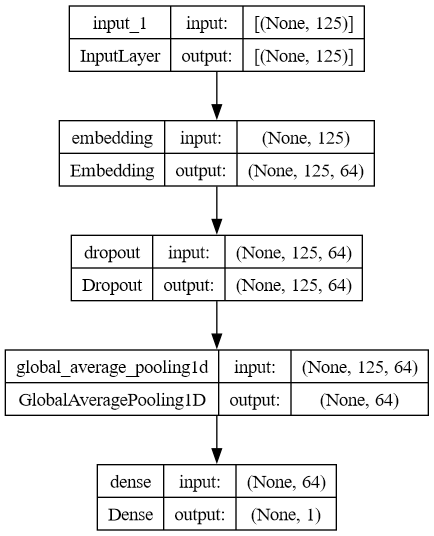

In [29]:
K.clear_session()
text_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words + 1, embedding_dim)(text_input)
hidden_state = Dropout(0.2)(hidden_state)
hidden_state = GlobalAveragePooling1D()(hidden_state)
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
plot_model_in_notebook(model)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 125)]             0         
                                                                 
 embedding (Embedding)       (None, 125, 64)           3200064   
                                                                 
 dropout (Dropout)           (None, 125, 64)           0         
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 3,200,129
Trainable params: 3,200,129
Non-trainable params: 0
___________________________________________________

## While things are fitting:
 - ## Where are the majority of the parameters?
 - ## Does that make sense?

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr = ReduceLROnPlateau(patience=1, verbose=True)
es = EarlyStopping(patience=2, verbose=True)

In [32]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    shuffle=True,
    batch_size=128, 
    callbacks=[lr, es]
)

Epoch 1/10
196/196 [==============================] - 7s 33ms/step - loss: 0.6580 - acc: 0.7052 - val_loss: 0.6095 - val_acc: 0.7432 - lr: 0.0010
Epoch 2/10
196/196 [==============================] - 6s 32ms/step - loss: 0.5362 - acc: 0.7948 - val_loss: 0.5021 - val_acc: 0.7929 - lr: 0.0010
Epoch 3/10
196/196 [==============================] - 6s 32ms/step - loss: 0.4309 - acc: 0.8391 - val_loss: 0.4378 - val_acc: 0.8171 - lr: 0.0010
Epoch 4/10
196/196 [==============================] - 6s 31ms/step - loss: 0.3628 - acc: 0.8663 - val_loss: 0.4036 - val_acc: 0.8266 - lr: 0.0010
Epoch 5/10
196/196 [==============================] - 6s 32ms/step - loss: 0.3161 - acc: 0.8844 - val_loss: 0.3835 - val_acc: 0.8333 - lr: 0.0010
Epoch 6/10
196/196 [==============================] - 7s 38ms/step - loss: 0.2808 - acc: 0.8983 - val_loss: 0.3703 - val_acc: 0.8388 - lr: 0.0010
Epoch 7/10
196/196 [==============================] - 8s 40ms/step - loss: 0.2516 - acc: 0.9114 - val_loss: 0.3629 - val_acc

## For time reasons, we won't keep fitting...

<AxesSubplot:>

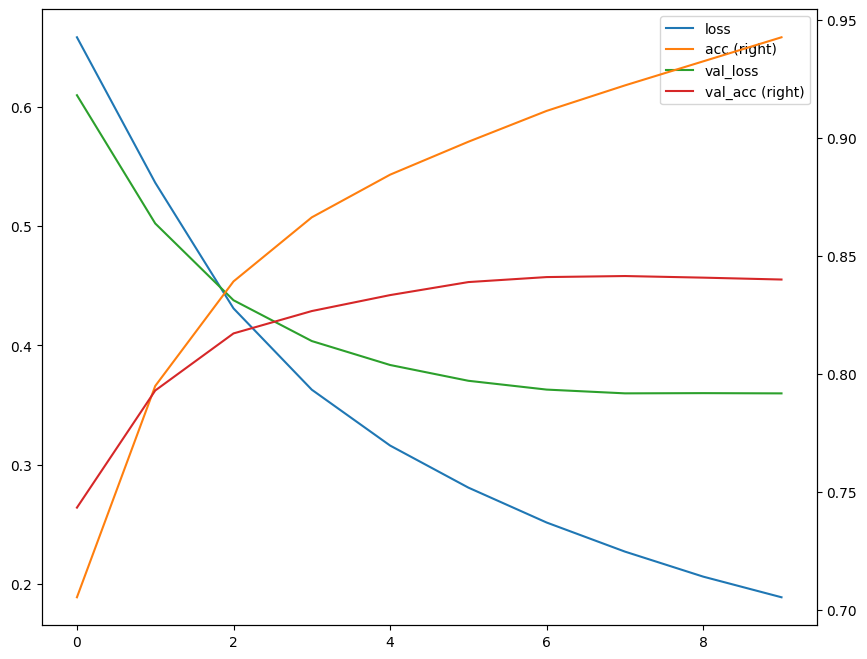

In [33]:
pd.DataFrame(model.history.history).drop("lr", axis=1).plot(
    figsize=(10, 8), secondary_y=["acc", "val_acc"]
)

# So... we made things worse!
 - ## Not really: we're looking at the first 125 words only!
# $ \\ $
# $ \\ $
# $ \\ $

In [34]:
from tensorflow.keras.layers import Flatten
Flatten?

Init signature: Flatten(data_format=None, **kwargs)
Docstring:     
Flattens the input. Does not affect the batch size.

Note: If inputs are shaped `(batch,)` without a feature axis, then
flattening adds an extra channel dimension and output shape is `(batch, 1)`.

Args:
  data_format: A string,
    one of `channels_last` (default) or `channels_first`.
    The ordering of the dimensions in the inputs.
    `channels_last` corresponds to inputs with shape
    `(batch, ..., channels)` while `channels_first` corresponds to
    inputs with shape `(batch, channels, ...)`.
    It defaults to the `image_data_format` value found in your
    Keras config file at `~/.keras/keras.json`.
    If you never set it, then it will be "channels_last".

Example:

>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
>>> model.output_shape
(None, 1, 10, 64)

>>> model.add(Flatten())
>>> model.output_shape
(None, 640)
File:           c:\users\rob6694\minic

In [35]:
data = np.arange(20).reshape(5, 2, 2).astype(np.float32)
data


array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[ 4.,  5.],
        [ 6.,  7.]],

       [[ 8.,  9.],
        [10., 11.]],

       [[12., 13.],
        [14., 15.]],

       [[16., 17.],
        [18., 19.]]], dtype=float32)

In [36]:
print(data.shape)

(5, 2, 2)


In [37]:
outputs = Flatten()(K.variable(data))
outputs = K.eval(outputs)
print(outputs.shape)
outputs

(5, 4)


array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]], dtype=float32)

In [38]:
K.clear_session()
text_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words + 1, embedding_dim)(text_input)
hidden_state = Dropout(0.2)(hidden_state)
hidden_state = Flatten()(hidden_state)


## What is the shape of `hidden_state`?
# $ \\ $
# $ \\ $
# $ \\ $

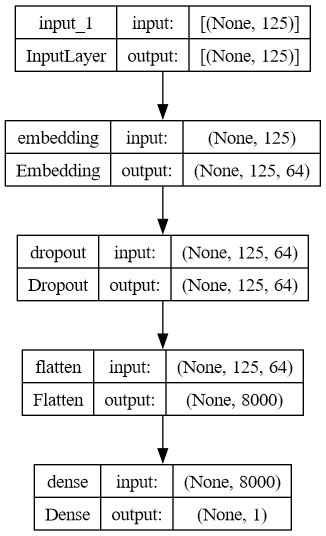

In [39]:
K.clear_session()
text_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words + 1, embedding_dim)(text_input)
hidden_state = Dropout(0.2)(hidden_state)
hidden_state = Flatten()(hidden_state)

output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
plot_model_in_notebook(model)

## While things fit:
 - ## Where are the majority of the params?

In [40]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    shuffle=True,
    batch_size=128, 
    callbacks=[lr, es]
)

Epoch 1/10
196/196 [==============================] - 7s 30ms/step - loss: 0.6109 - acc: 0.6712 - val_loss: 0.4489 - val_acc: 0.8086 - lr: 0.0010
Epoch 2/10
196/196 [==============================] - 6s 29ms/step - loss: 0.3091 - acc: 0.8824 - val_loss: 0.3631 - val_acc: 0.8401 - lr: 0.0010
Epoch 3/10
195/196 [============================>.] - ETA: 0s - loss: 0.1662 - acc: 0.9511
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
196/196 [==============================] - 6s 28ms/step - loss: 0.1662 - acc: 0.9510 - val_loss: 0.3793 - val_acc: 0.8279 - lr: 0.0010
Epoch 4/10
196/196 [==============================] - ETA: 0s - loss: 0.0905 - acc: 0.9853
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
196/196 [==============================] - 6s 28ms/step - loss: 0.0905 - acc: 0.9853 - val_loss: 0.3667 - val_acc: 0.8370 - lr: 1.0000e-04
Epoch 4: early stopping


In [41]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 125)]             0         
                                                                 
 embedding (Embedding)       (None, 125, 64)           3200064   
                                                                 
 dropout (Dropout)           (None, 125, 64)           0         
                                                                 
 flatten (Flatten)           (None, 8000)              0         
                                                                 
 dense (Dense)               (None, 1)                 8001      
                                                                 
Total params: 3,208,065
Trainable params: 3,208,065
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

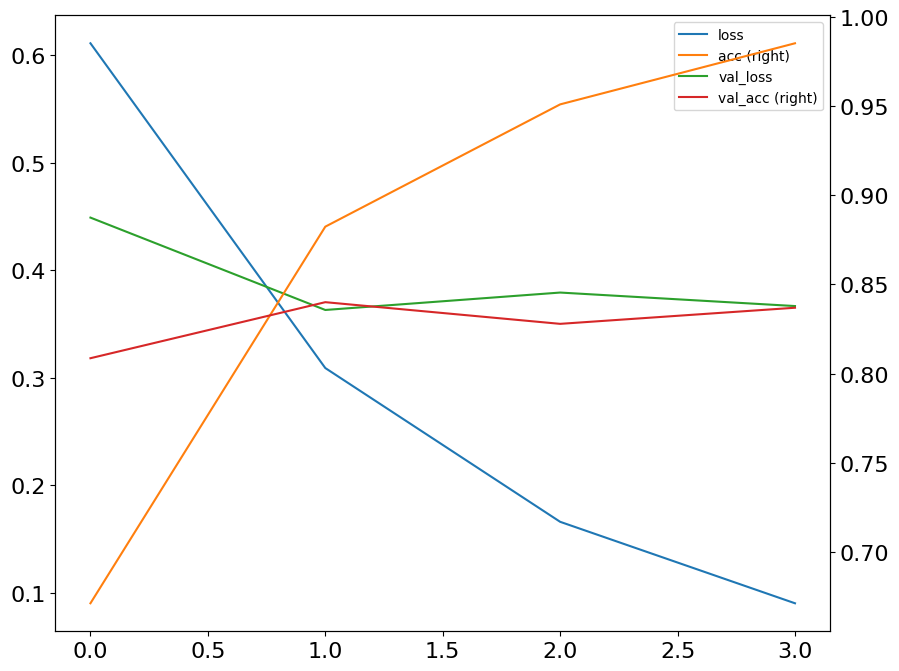

In [42]:
pd.DataFrame(model.history.history).drop("lr", axis=1).plot(
    figsize=(10, 8), secondary_y=["acc", "val_acc"], fontsize=16
)


## Are we surprised that we didn't keep improving val accuracy?
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $
# Recap:
- ## We had the BOW representation
- ## We stacked `Dense` layers with nonlinear functions to get more powerful models
- ## We enhanced our text representation to make embeddings for words
  - ## combat some shortcomings from BOW

## Most complex model: 
 - ## Embeddings to represent words
 - ## Either flattened or averaged over the new dimension
 - ## Use 1 or more `Dense` layers on this representation

# $ \\ $
# $ \\ $
## We now respect order 
 - ## The quick brown `fox` jumps over the lazy `dog`
 - ## The quick brown `dog` jumps over the lazy `fox`

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $


# What is wrong with unrolling the sequence?
# $ \\ $
# $ \\ $
# Let's examine our unrolled output
# $ \\ $
# Word sequence: $[I, went, to, the, store]$
# $ \\ $
# Integer sequence $[5, 11, 4, 1, 19]$
# $ \\ $
# Embedding $\begin{bmatrix}
d_{1,1} & d_{1,2} & ...& d_{1,N}\\
d_{2,1} & d_{2,2} & ... & d_{2,N}\\
...\\
d_{M,1} & d_{M,2} & ... & d_{M,N}]
\end{bmatrix}$
# $ \\ $
# Flattened $[d_{1,1}d_{1,2}...d_{1,N}d_{2,1}d_{2,2}...d_{2,N}d_{M,1}d_{M,2}...d_{M,N}]$
# $ \\ $
# $ \\ $
# There's something a bit strange about unrolling the sequence
 - ## We had two dimensions that represented different things: position in sequence, $d_{embed}$
 - ## We mix them together when we unroll the sequence

# $ \\ $
# $ \\ $
## There are adverse consequences!
# $ \\ $
# $ \\ $

# Position in the sequence matters!
## <center>I like Dan. I like Keras.</center>
## <center>I like Keras. I like Dan.</center>

# $ \\ $
# $ \\ $
# $ \\ $
## Said differently: We worked really hard to have a better text representation that preserves order
 - ## But we don't have the right matrix operations (layers) to take advantage.

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# We'll cover two ways to process sequences
 - ## Recurrent Neural Networks: process sequences element by element
 - ## Convolutional Neural Networks: process sequences in sliding chunks


# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

# Go to slides. Intro to RNN

In [43]:
from tensorflow.keras.layers import SimpleRNN
SimpleRNN?

Init signature:
SimpleRNN(
    units,
    activation='tanh',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    **kwargs,
)
Docstring:     
Fully-connected RNN where the output is to be fed back to input.

See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
for details about the usage of RNN API.

Args:
  units: Positive integer, dimensionality of the output space.
  activation: Activation function to use.
    Default: hyperbolic tangent (`tanh`).
    If you pass None, no activation is applied
    (ie. "linear" activation: `a(x

In [44]:
K.clear_session()


text_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words, embedding_dim, input_length=MAX_SEQ_LEN)(text_input)
hidden_state = SimpleRNN(64, return_sequences=False)(hidden_state)


## What is the shape of `hidden_state`
# $ \\ $
# $ \\ $
# $ \\ $

In [45]:
K.clear_session()


text_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words, embedding_dim, input_length=MAX_SEQ_LEN)(text_input)
hidden_state = SimpleRNN(64)(hidden_state)
output = Dense(1, activation="sigmoid")(hidden_state)

model = Model(text_input, output)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

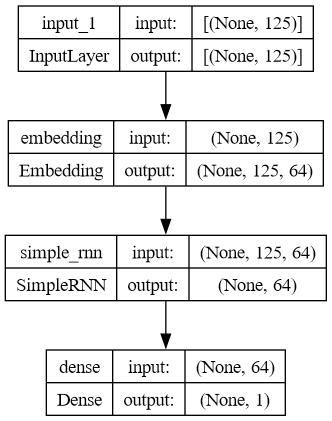

In [46]:
plot_model_in_notebook(model)

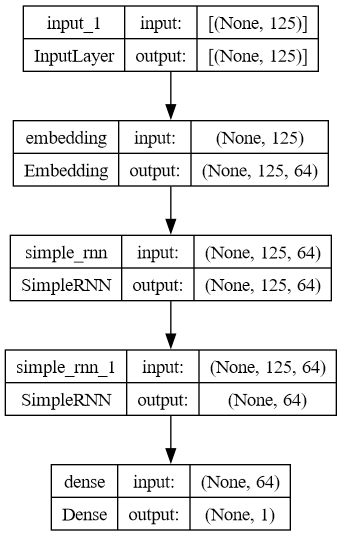

In [47]:
K.clear_session()


text_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words, embedding_dim, input_length=MAX_SEQ_LEN)(text_input)
hidden_state = SimpleRNN(64, return_sequences=True)(hidden_state)
hidden_state = SimpleRNN(64, return_sequences=False)(hidden_state)
output = Dense(1, activation="sigmoid")(hidden_state)

model = Model(text_input, output)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

plot_model_in_notebook(model)

# In practice, a `SimpleRNN` falls short:
 - ## They can't efficiently caprture long-term behavior
 - ## They are prone to overfitting, even with `dropout` and `recurrent_dropout`


# You will essentially NEVER use a `SimpleRNN`
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $
# `SimpleRNN` alternatives
 - ## Layers that are recurrent networks
 - ## Have additional logic to explicitly "forget" and "remember" things

# $ \\ $
## LSTM (long short term memory)
 - ## more powerful
 - ## Less stable
 - ## Slower
 - ## Good choice if you need want to spend time squeezing juice from your network
 - ## See [here](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) for a nice explanation

# $ \\ $
# $ \\ $
## GRU (gated recurrent unit)
 - ## less power (capacity)
 - ## More stable
 - ## Good "every-day" RNN choice



In [48]:
from tensorflow.keras.layers import LSTM, GRU

In [49]:
K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words, embedding_dim, input_length=MAX_SEQ_LEN)(word_input)

hidden_state = GRU(
    128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True
)(hidden_state)


## What is the shape of `hidden_state`
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

In [50]:
K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(num_words, embedding_dim, input_length=MAX_SEQ_LEN)(word_input)

hidden_state = GRU(
    128,
    dropout=0.2,
    recurrent_dropout=0.2,
    return_sequences=True,
)(hidden_state)
hidden_state = GRU(
    64,
    dropout=0.2,
    recurrent_dropout=0.2,
    return_sequences=False,
)(hidden_state)

output = Dense(1, activation="sigmoid")(hidden_state)

model = Model(word_input, output)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [51]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 125)]             0         
                                                                 
 embedding (Embedding)       (None, 125, 64)           3200000   
                                                                 
 gru (GRU)                   (None, 125, 128)          74496     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 3,311,809
Trainable params: 3,311,809
Non-trainable params: 0
_________________________________________________________________


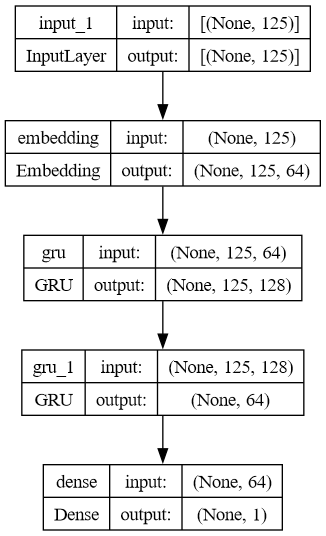

In [52]:
plot_model_in_notebook(model)

In [53]:
lr = ReduceLROnPlateau(patience=1, verbose=True)
es = EarlyStopping(patience=2, verbose=True)

In [54]:
# ~60s epoch
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    shuffle=True,
    batch_size=128, 
    callbacks=[lr, es]
)

Epoch 1/10
196/196 [==============================] - 355s 2s/step - loss: 0.4918 - accuracy: 0.7401 - val_loss: 0.4023 - val_accuracy: 0.8177 - lr: 0.0010
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.9021
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
196/196 [==============================] - 331s 2s/step - loss: 0.2565 - accuracy: 0.9021 - val_loss: 0.4368 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.1235 - accuracy: 0.9595
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
196/196 [==============================] - 330s 2s/step - loss: 0.1235 - accuracy: 0.9595 - val_loss: 0.4918 - val_accuracy: 0.8187 - lr: 1.0000e-04
Epoch 3: early stopping


## While things fit:
 - ## Where are the majority of the free parameters?
 - ## Why is this so slow

<AxesSubplot:>

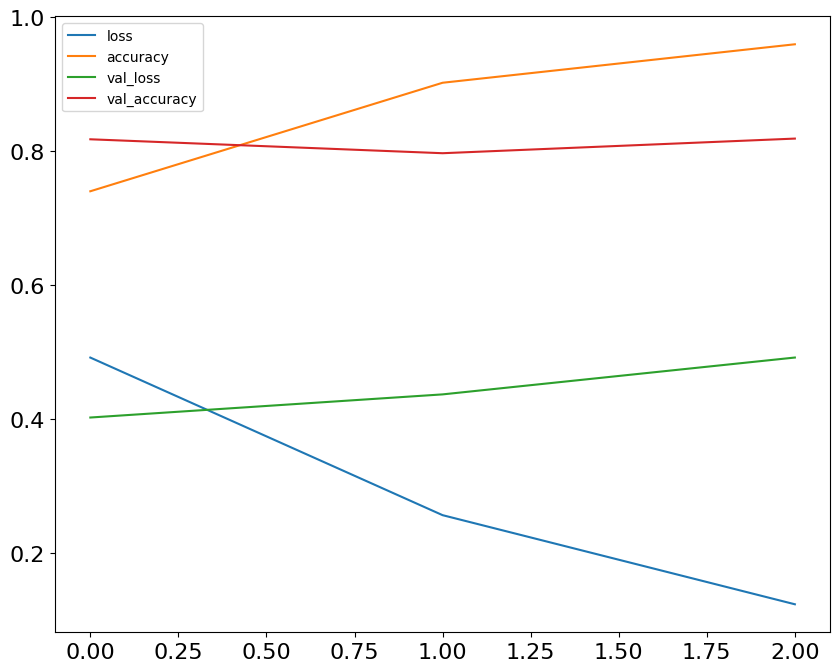

In [55]:
pd.DataFrame(model.history.history).drop("lr", axis=1).plot(
    figsize=(10, 8), secondary_y=["acc", "val_acc"], fontsize=16
)

# We made things worse again!
 - ## In reality, the IMDB sentiment problem is not complex enough to warrant this horsepower!

# $ \\ $
# $ \\ $
# $ \\ $
# Note: RNNs take a long time to train
 - ## Sequences need to be processed IN ORDER

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# Recap:
- ## We had the BOW representation
- ## We stacked `Dense` layers with nonlinear functions to get more powerful models
- ## We enhanced our text representation to make embeddings for words
  - ## combat some shortcomings from BOW
- ## We didn't really have the right matrix operations to operate on our sequences
  - ## Flatten / Average aren't quite right

# $ \\ $
# $ \\ $
## We introduced recurrent networks
- ## Kind of "read" from left to right
- ## More complex operations
- ## Take advantage of our new embedding representation

# $ \\ $
# $ \\ $
# RNNs didn't really improve the IMDB problem!
 - ## RNNs are powerful tools, but maybe too complex
 - ## RNNs can learn global context: something at the beginning of a document can impact the end.
 - ## Most of the reviews are more local in context.

# $ \\ $
# $ \\ $
# $ \\ $


# $ \\ $
# $ \\ $

# Shortfalls of RNNs
 - ## RNNs are also slow
   - ## We have to process each document sequentially. 
   - ## While we only have two matrices in each RNN, the "gradient trick" needs to propagate through the whole sequence
 - ## Able to capture global context by design
   - ## But we don't always need that?

# $ \\ $
# $ \\ $



In [56]:
with open("../data/aclImdb/train/pos/10018_8.txt") as fi:
    txt = fi.read()

words = txt.split()

window = 15
for i in sorted(np.random.randint(0, len(words) - window, size=(10,))):
    print(" ".join(words[i : (i + window)]))

This Night Listener is better than people are generally saying. It has weaknesses, and it
are generally saying. It has weaknesses, and it seems to be having a genre identity
its creepy atmosphere and intriguing performances make up for this. The whole thing feels like
those fireside "this happened to a friend of a friend of mine" ghost stories. One
complaint about the movie is the pacing: but the slow and sometimes awkward pacing is
in this movie is kept well within the realm of possibility, and real life just
realm of possibility, and real life just sort of plods alongno? So there are no
there are no flashy endings or earth-shattering revelations, no "showdown" scenes. Thank Heaven. You have
meets the needs of the story, plus his character is supposed to be somewhat generic
it a shot. For quality and content alone, The Night Listener is surely in the



# $ \\ $
# $ \\ $
# What should we do?
# $ \\ $
# $ \\ $
# Convolutions for NLP
# $ \\ $
# 1-Dimensional Convolution Recipe
 - ## Take a fixed-width window (patch) of a sequence
 - ## Apply a fixed (learnable) operation to the window (indenpendent of the previous or following windows)
 - ## Repeat for every window in the sequence

# $ \\ $
![1d-conv](./1d-conv.png)
# $ \\ $
# $ \\ $
# Note: this looks very "stackable"
# $ \\ $
# $ \\ $

## What are the choices here?
 - ## In a `Dense` layer we had just the dimension of the new representation
# $ \\ $
# $ \\ $
## 
 - ## Output dimension
 - ## Window size
 - ## Step between successive patches (stride)
 - ## Edge effects
# $ \\ $
# $ \\ $
# $ \\ $


# Pooling
# $ \\ $
## In RNNs we used the output of the final step in the sequence because it "included" information from all previous ones.
# $ \\ $
## Can we do this with convolutions?
# $ \\ $
# $ \\ $
# Options
## Take max / average value over certain windows
 - ## preserves "sequence" behavior, (like `return_sequences=True`)


## Take max / average of entire sequence
 - ## kills sequence behavior (like `return_sequences=False`)

# $ \\ $
# $ \\ $
## NOTE: becuase of the way we extract patches and the windows over which we take max/avg, the output sequence is NOT the same length as the input sequence
 - ## Sometimes that is a problem
 - ## Sometimes it's useful!

In [57]:
from tensorflow.keras.layers import Conv1D
Conv1D?

Init signature:
Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding='valid',
    data_format='channels_last',
    dilation_rate=1,
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
1D convolution layer (e.g. temporal convolution).

This layer creates a convolution kernel that is convolved
with the layer input over a single spatial (or temporal) dimension
to produce a tensor of outputs.
If `use_bias` is True, a bias vector is created and added to the outputs.
Finally, if `activation` is not `None`,
it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide an `input_shape` argument
(tuple of integers or `None`, e.g.
`(10, 128)` for sequences of 10 vectors of 128-dimensional vectors,
or `(No

```python 
Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding="valid",
    data_format="channels_last",
    dilation_rate=1,
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

## Imagine a case with a batch of 4
 - ## Sequence length of 10 (ie 10 words)
 - ## 128-d vectors (ie embedding dim)

# $ \\ $
## We want 
 - ## a 32-d output vector size
 - ## kernel-width of 3 words

# $ \\ $
# $ \\ $
## Steps
 - ## Extract all the "patches" of 3 words
 - ## Multiply each patch by the kerel ($\mathbb{R}^{128}\times \mathbb{R}^{32}$) for each

# $ \\ $
# $ \\ $
## How many 3-word patches are there?
# $ \\ $
# $ \\ $
# $ \\ $
## With a stride of 1 we have
 - ## [1,2,3], [2, 3, 4], [3, 4, 5], ... [8,9,10] (=8 in total)

# $ \\ $
## NB: we'd have a different output sequence size if 
 - ## We used a different stride
 - ## We "padded" and stuck 0's at the ends of the sequence

In [58]:
K.clear_session()

input_shape = (4, 10, 128)
data = np.random.normal(size=input_shape)
data.shape

(4, 10, 128)

In [59]:
layer = Conv1D(32, 3, activation="relu", input_shape=input_shape)
outputs = layer(K.variable(data))
outputs = K.eval(outputs)
outputs.shape

(4, 8, 32)

In [60]:
layer = Conv1D(32, 3, activation="relu", padding="same", input_shape=input_shape)
outputs = layer(K.variable(data))
outputs = K.eval(outputs)
outputs.shape

(4, 10, 32)

In [61]:
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPooling1D
MaxPooling1D?

Init signature:
MaxPooling1D(
    pool_size=2,
    strides=None,
    padding='valid',
    data_format='channels_last',
    **kwargs,
)
Docstring:     
Max pooling operation for 1D temporal data.

Downsamples the input representation by taking the maximum value over a
spatial window of size `pool_size`. The window is shifted by `strides`.  The
resulting output, when using the `"valid"` padding option, has a shape of:
`output_shape = (input_shape - pool_size + 1) / strides)`

The resulting output shape when using the `"same"` padding option is:
`output_shape = input_shape / strides`

For example, for `strides=1` and `padding="valid"`:

>>> x = tf.constant([1., 2., 3., 4., 5.])
>>> x = tf.reshape(x, [1, 5, 1])
>>> max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=2,
...    strides=1, padding='valid')
>>> max_pool_1d(x)
<tf.Tensor: shape=(1, 4, 1), dtype=float32, numpy=
array([[[2.],
        [3.],
        [4.],
        [5.]]], dtype=float32)>

For example, for `strides=2` and `padding="

```python
tf.keras.layers.MaxPooling1D(
    pool_size=2, strides=None, padding="valid", data_format="channels_last", **kwargs
)
```

In [62]:
data = np.arange(1, 6).reshape(1, 5, 1)
data

array([[[1],
        [2],
        [3],
        [4],
        [5]]])

In [63]:
output = []
for i in range(data.shape[1] - 1):
    output.append(data[0, i:i+2, 0].max())
np.array(output)[:, np.newaxis]

array([[2],
       [3],
       [4],
       [5]])

In [64]:
layer = MaxPooling1D(pool_size=2, strides=1, padding="valid")
outputs = layer(K.variable(data))
outputs = K.eval(outputs)
outputs

array([[[2.],
        [3.],
        [4.],
        [5.]]], dtype=float32)

In [65]:
layer = GlobalMaxPooling1D()
outputs = layer(K.variable(data))
outputs = K.eval(outputs)
outputs

array([[5.]], dtype=float32)

## Typical convolutional network
 - ## interleve convolutions and pooling
 - ## end in a max pooling operation

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 125)]             0         
                                                                 
 embedding (Embedding)       (None, 125, 100)          5000100   
                                                                 
 conv1d (Conv1D)             (None, 119, 128)          89728     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 53, 64)            57408     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 26, 64)           0         
 1D)                                                         

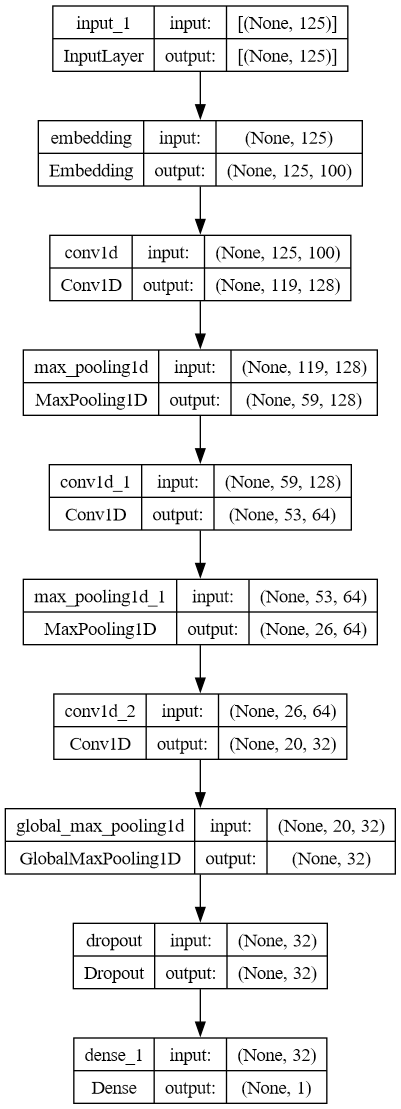

In [66]:
K.clear_session()
text_input = Input(shape=(MAX_SEQ_LEN,), dtype="int32")
hidden_state = Embedding(tokenizer.num_words + 1, 100)(text_input)
hidden_state = Conv1D(128, 7, activation="relu")(hidden_state)
hidden_state = MaxPooling1D(2)(hidden_state)
hidden_state = Conv1D(64, 7, activation="relu")(hidden_state)
hidden_state = MaxPooling1D(2)(hidden_state)
hidden_state = Conv1D(32, 7, activation="relu")(hidden_state)
hidden_state = GlobalMaxPooling1D()(hidden_state)
hidden_state = Dropout(0.2)(hidden_state)
output = Dense(32, activation="relu")(hidden_state)
output = Dense(1, activation="sigmoid")(hidden_state)
model = Model(text_input, output)
model.compile("adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()
plot_model_in_notebook(model)

In [67]:
lr = ReduceLROnPlateau(patience=1, verbose=True)
es = EarlyStopping(patience=2, verbose=True)

model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    shuffle=True,
    batch_size=128, 
    callbacks=[lr, es]
)

Epoch 1/10
196/196 [==============================] - 27s 132ms/step - loss: 0.5280 - acc: 0.7040 - val_loss: 0.3986 - val_acc: 0.8188 - lr: 0.0010
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.2578 - acc: 0.8986
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
196/196 [==============================] - 24s 125ms/step - loss: 0.2578 - acc: 0.8986 - val_loss: 0.4719 - val_acc: 0.7962 - lr: 0.0010
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.1064 - acc: 0.9675
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
196/196 [==============================] - 25s 130ms/step - loss: 0.1064 - acc: 0.9675 - val_loss: 0.5258 - val_acc: 0.8080 - lr: 1.0000e-04
Epoch 3: early stopping


## While things fit:
 - ## Notice this is faster despite having 5e6 free parameters

<AxesSubplot:>

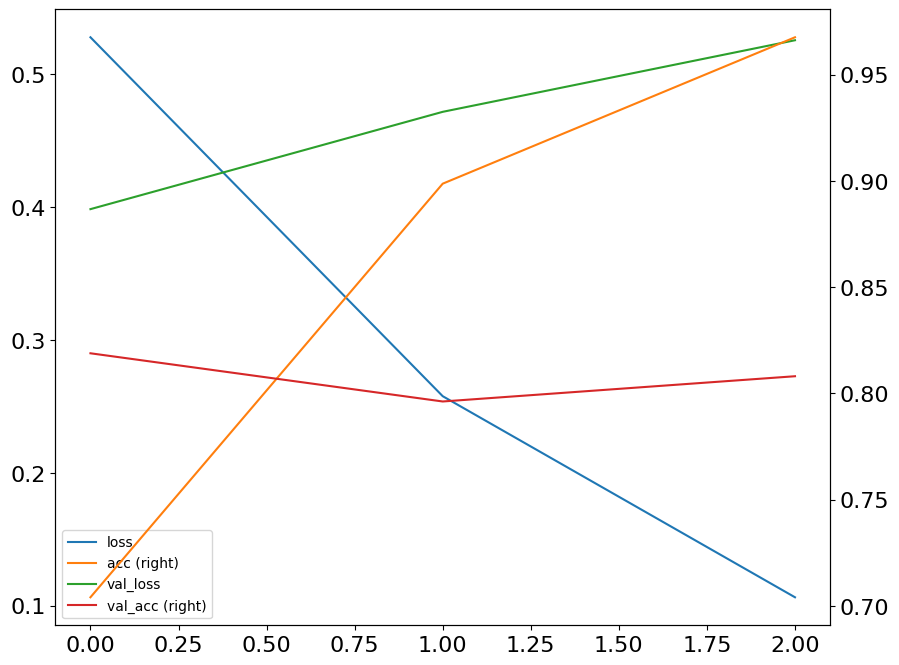

In [68]:
pd.DataFrame(model.history.history).drop("lr", axis=1).plot(
    figsize=(10, 8), secondary_y=["acc", "val_acc"], fontsize=16
)

# $ \\ $
# $ \\ $
# Recap:
- ## Start with BOW representation
- ## Stack `Dense` layers with nonlinear functions to get more powerful models


# $ \\ $

## We said the rest of NLP was
 - ## Finding better matrix operations to build models from
 - ## Finding better representations for text
 - ## (We mentioned these would blur slightly)

# $ \\ $
## We realized the BOW was going to fall short
- ## Enhance our text representation to make embeddings for words
  - ## combat some shortcomings from BOW
- ## We didn't really have the right machinery to use this better representation
  - ## Flattening, averaging

# $ \\ $
# $ \\ $
## We introduced two ways to process our word-embedding sequences
## Recurrent networks
- ## Kind of "read" from left to right 
- ## More complex operations
- ## Take advantage of our new embedding representation

# $ \\ $
## 1-D convolutional networks
- ## Simpler and faster than RNN
- ## Better at short sequences
- ## Worse at long sequences



# $ \\ $
# $ \\ $
# $ \\ $
# What should we do now?
# $ \\ $
# $ \\ $
# Introduce a more complex representation for text
# $ \\ $
# $ \\ $
# $ \\ $
# Where do embeddings fall short
# $ \\ $
# $ \\ $
## Synonyms: 
## <center> The WHO officially `sanctioned` use of a new drug </center>
## <center> The UN `sanctioned` several countries for nuclear proliferation</center>

## Both instances of the word `sanctioned` get the same vector
## We will return to this issue
# $ \\ $
# $ \\ $
## Unknown words:
 - ## We've been using only the 50k most common words
 - ## We know we're throwing away words
 - ## We "waste" space on similar words: `jump`, `jumps`, `jumped`

## Word boundaries:
- ## we've been taking for granted that we know how to split words correctly
- ## What about hyphens? 

# $ \\ $
# $ \\ $
# Idea: Let's represent words as sequences of characters!
 - ## We are much less likely to see unknown characters
 - ## The input space won't be huge (how many characters do you know?)
 - ## We don't have to worry about word tokenization
 - ## Maybe `jump` and `jumps` can "share" a lot of the representation
 - ## There's nothing special about a space 



In [69]:
# ok to restart
import numpy as np
import pandas as pd
import glob
import os

%pylab inline

np.random.seed(1234)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [70]:
import sys
sys.path.insert(0, ".")
from helpers import load_imdb_data_text


In [71]:
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('../data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


## How should we represent text?
# $ \\ $ 
# $ \\ $
## Before (word representation)
 - ## Integer sequences (`list`) padded to constant length (`np.array`)
 - ## Vocab: $\mathit{O}$(100k), Sequence length $\mathit{O}(100)$

# $ \\ $
# $ \\ $
## Now (character representation)
 - ## Integer sequences (`list`) padded to constant length (`np.array`)
 - ## Vocab: $\mathit{O}$(100), Sequence length $\mathit{O}(1000)$


In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [73]:
Tokenizer?

Init signature:
Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    analyzer=None,
    **kwargs,
)
Docstring:     
Text tokenization utility class.

Deprecated: `tf.keras.preprocessing.text.Tokenizer` does not operate on
tensors and is not recommended for new code. Prefer
`tf.keras.layers.TextVectorization` which provides equivalent functionality
through a layer which accepts `tf.Tensor` input. See the
[text loading tutorial](https://www.tensorflow.org/tutorials/load_data/text)
for an overview of the layer and text handling in tensorflow.

This class allows to vectorize a text corpus, by turning each
text into either a sequence of integers (each integer being the index
of a token in a dictionary) or into a vector where the coefficient
for each token could be binary, based on word count, based on tf-idf...

By default, all punctuation is removed, turning the texts into
space-separ

In [74]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(train_docs)

train_sequences = tokenizer.texts_to_sequences(train_docs)
test_sequences = tokenizer.texts_to_sequences(test_docs)
type(train_sequences), len(train_sequences)

(list, 25000)

In [75]:
len(tokenizer.word_index)

142

In [76]:
train_sequences[21][:10]

[20, 2, 11, 11, 22, 22, 22, 22, 22, 22]

In [77]:
reverse_lookup = {i: ch for ch, i in tokenizer.word_index.items()}

In [78]:
tokenizer.word_index[" "]

1

In [79]:
characters = [reverse_lookup[i] for i in train_sequences[21]]
print("".join(characters)[:600])

well.......in contrast to other comments previously written i have to say that the only good thing about this film is the fact that one guy in it looked a bit like jason donavon which reminded me of my youth. i have no idea how it won any awards, and although i'm sure a great deal of effort went into making it it was all fruitless as the final outcome is one which screams of early 90's foreign soap operas. the plot was non-existent, the cinematography was hopeless and the acting was on par with an a-level performance. it was unfortunately long and the sub-plots were incredibly unrealistic....f


In [80]:
MAX_SEQ_LEN = 512  # characters, this is probably a bit short
x_train = pad_sequences(train_sequences, maxlen=MAX_SEQ_LEN, truncating="post")
x_test = pad_sequences(test_sequences, maxlen=MAX_SEQ_LEN, truncating="post")
x_train.shape, x_train.max()

((25000, 512), 142)

## How should we model this? 
 - ## Over what length (in characters) do we expect to need to propagate information?

# $ \\ $
# $ \\ $
## We want to carry information over $\approx$ a word
 - ## Use convolution over 5-10 character
 - ## Build up multiple layers


In [81]:
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Embedding
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model

In [82]:
NUM_CHARS = len(tokenizer.word_index)
NUM_CHARS

142

In [83]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten


## Question: how should we represent text to our model?
 - ## We no longer have to use an embedding to reduce a 100k-d sparse input to a 100d dense one!

# $ \\ $
# $ \\ $
## We can just one-hot encode them!
# $ \\ $
# $ \\ $
## This is a new input size!

In [84]:
K.clear_session()
character_input = Input(shape=(MAX_SEQ_LEN, NUM_CHARS), dtype="float32")

hidden_state = Conv1D(256, 7, activation="relu")(character_input)
hidden_state = MaxPooling1D(pool_size=3)(hidden_state)

hidden_state = Conv1D(256, 7, activation="relu")(hidden_state)
hidden_state = MaxPooling1D(pool_size=3)(hidden_state)

hidden_state = Conv1D(128, 5, activation="relu")(hidden_state)
hidden_state = MaxPooling1D(pool_size=3)(hidden_state)

hidden_state = Conv1D(128, 7, activation="relu")(hidden_state)
hidden_state = MaxPooling1D(pool_size=3)(hidden_state)


hidden_state = GlobalMaxPooling1D()(hidden_state)


hidden_state = Dropout(0.1)(hidden_state)
hidden_state = Dense(128, activation="relu")(hidden_state)
hidden_state = Dropout(0.1)(hidden_state)
hidden_state = Dense(32, activation="relu")(hidden_state)
hidden_state = Dropout(0.1)(hidden_state)

output = Dense(1, activation="sigmoid")(hidden_state)

model = Model(character_input, output)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [85]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 142)]        0         
                                                                 
 conv1d (Conv1D)             (None, 506, 256)          254720    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 168, 256)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 162, 256)          459008    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 54, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 128)           163968

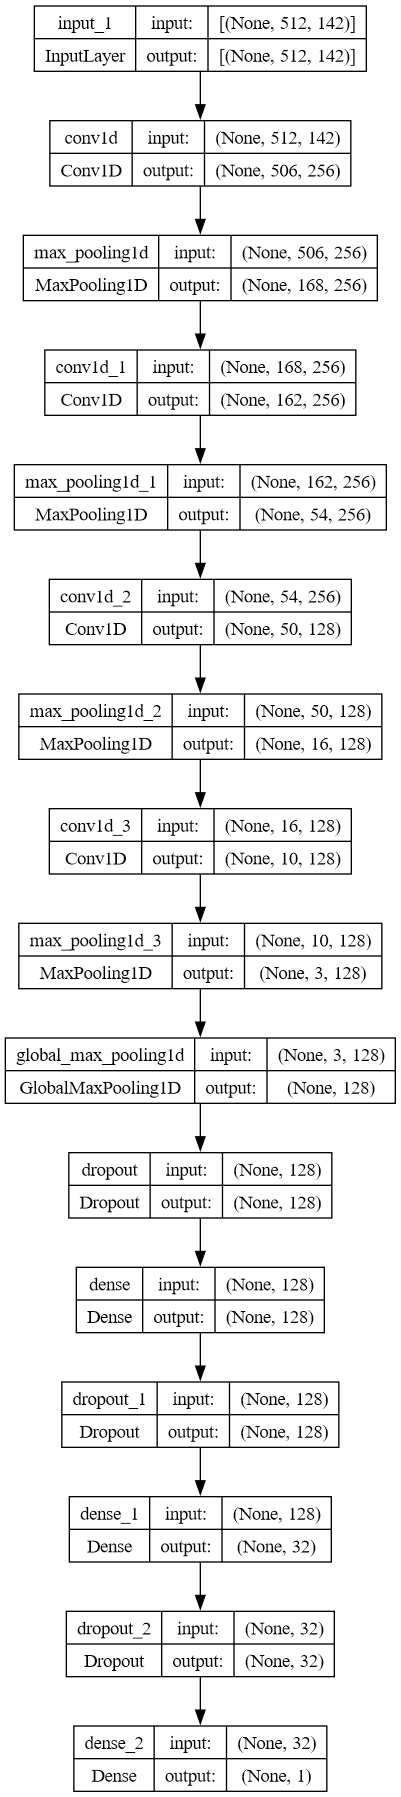

In [86]:
from IPython.display import Image
from tensorflow.keras.utils import model_to_dot

def plot_model_in_notebook(model):
    return Image(model_to_dot(model, show_shapes=True).create(prog='dot', format='png'))

plot_model_in_notebook(model)

## It can be too memory intensive to hold on to all of the one-hot encoded characters

In [87]:
from tensorflow.keras.utils import to_categorical

import funcy


def data_generator(x, y, batch_size):
    idx = np.arange(x.shape[0])
    while True:
        np.random.shuffle(idx)
        for chunk in funcy.chunks(batch_size, idx):
            yield to_categorical(x[chunk], num_classes=NUM_CHARS), y[chunk].astype(float)

In [88]:
x, y = next(data_generator(x_train, y_train, 4))
x.shape

(4, 512, 142)

In [89]:
"".join(reverse_lookup.get(i) for i in x[0].argmax(axis=1))

"wow. that's about as much as i can say right now. who writes this stuff? who produces this stuff? what self-respecting actor would agree to 'act' in this stuff? oh my god! i don't know how i made it through this movie, but i assume the fact that i had had like 8 cups of coffee that day was the key element in keeping me awake. good lord! it was one of the most droned-out and predictable pieces of cinematography i have ever witnessed...and for the record, i don't ever plan to 'witness' it again.<br /><br />i "

In [91]:
lr = ReduceLROnPlateau(patience=1, verbose=True)
es = EarlyStopping(patience=2, verbose=True, restore_best_weights=True)

batch_size = 256


model.fit(
    data_generator(x_train, y_train, batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_steps=x_test.shape[0] // batch_size,
    validation_data=data_generator(x_test, y_test, batch_size),
    callbacks=[lr, es],
    epochs=30,
)

Epoch 1/30
 6/97 [>.............................] - ETA: 2:52 - loss: 0.6916 - accuracy: 0.5299

UnknownError: Graph execution error:

IndexError: index 142 is out of bounds for axis 1 with size 142
Traceback (most recent call last):

  File "c:\Users\ROB6694\Miniconda3\envs\Nick\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\ROB6694\Miniconda3\envs\Nick\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\ROB6694\Miniconda3\envs\Nick\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1039, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\Users\ROB6694\Miniconda3\envs\Nick\lib\site-packages\keras\engine\data_adapter.py", line 901, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\ROB6694\AppData\Local\Temp\ipykernel_31876\2438483296.py", line 11, in data_generator
    yield to_categorical(x[chunk], num_classes=NUM_CHARS), y[chunk].astype(float)

  File "c:\Users\ROB6694\Miniconda3\envs\Nick\lib\site-packages\keras\utils\np_utils.py", line 73, in to_categorical
    categorical[np.arange(n), y] = 1

IndexError: index 142 is out of bounds for axis 1 with size 142


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_47626]

In [92]:
pd.DataFrame(model.history.history).plot(
    figsize=(10, 8), secondary_y=["acc", "val_acc"], fontsize=16
)

TypeError: no numeric data to plot

## This is pretty remarkable! 
 - ## We are learning to do sentiment entirely from a character representation

# $ \\ $
# $ \\ $

# Recap:

## Character-level language representation
 - ## Much smaller vocabulary (there are ~100 characters)
 - ## Longer sequences
 - ## No tokenization needed
 - ## Similar words will be similar by design (`jump` vs `jumps`)
 - ## All our sequence processing capabilities will work
 - ## Convolutions are very common since character-level information is pretty local
 - ## You can mix and match: convolutions over characters + lstm over the convolutional outputs


# $ \\ $
# $ \\ $
# $ \\ $
# Going Further:
 - ## In reality word-based and character-based representations can fall short
 - ## In some sense they are both somewhat forced / contrived / based on the how humans learn language
 - ## Make no sense in languages like Mandarin and Japanese

# $ \\ $
# $ \\ $
## There are hybrid / different representations that make modeling language easier
 - ## Most have sub-word information encoded in them


# $ \\ $
# $ \\ $
## Byte pair encoding
 - ## Combines frequent pairs of characters to make subwords
 - ## Entirely frequency based
 - ## Specified, fixed vocab size
 - ## [wikipedia reference](https://en.wikipedia.org/wiki/Byte_pair_encoding)
 - ## [blog post](https://petuum.com/2019/11/26/byte-pair-encoding-the-dark-horse-of-modern-nlp/)

# $ \\ $
## Word Piece
 - ## Based on a language model
 - ## Combine characters to make subwords based on LM entropy
 - ## [papers with code explanation](https://paperswithcode.com/method/wordpiece)
 - ## [original paper with recipe](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/37842.pdf)


# $ \\ $
# $ \\ $
# $ \\ $
### [medium post with more](https://medium.com/@makcedward/how-subword-helps-on-your-nlp-model-83dd1b836f46)
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

## Further reading
 - ## [original character-based conv paper](https://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf)
   - ## Original title was "Text Understanding from Scratch" since it understands text without the concept of a `word` or `token`.
   - ## [keras implementation](https://keras.io/examples/nlp/text_classification_from_scratch/)

# $ \\ $
- ## RNNs for timeseries forecasting
   - ## [keras example on weather](https://keras.io/examples/timeseries/timeseries_weather_forecasting/)
